In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import warnings
import pydotplus
from IPython.display import Image

In [2]:
# Loading data
file_path = Path("../Project-2/Resources/credit card data.csv")
df = pd.read_csv(file_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [3]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

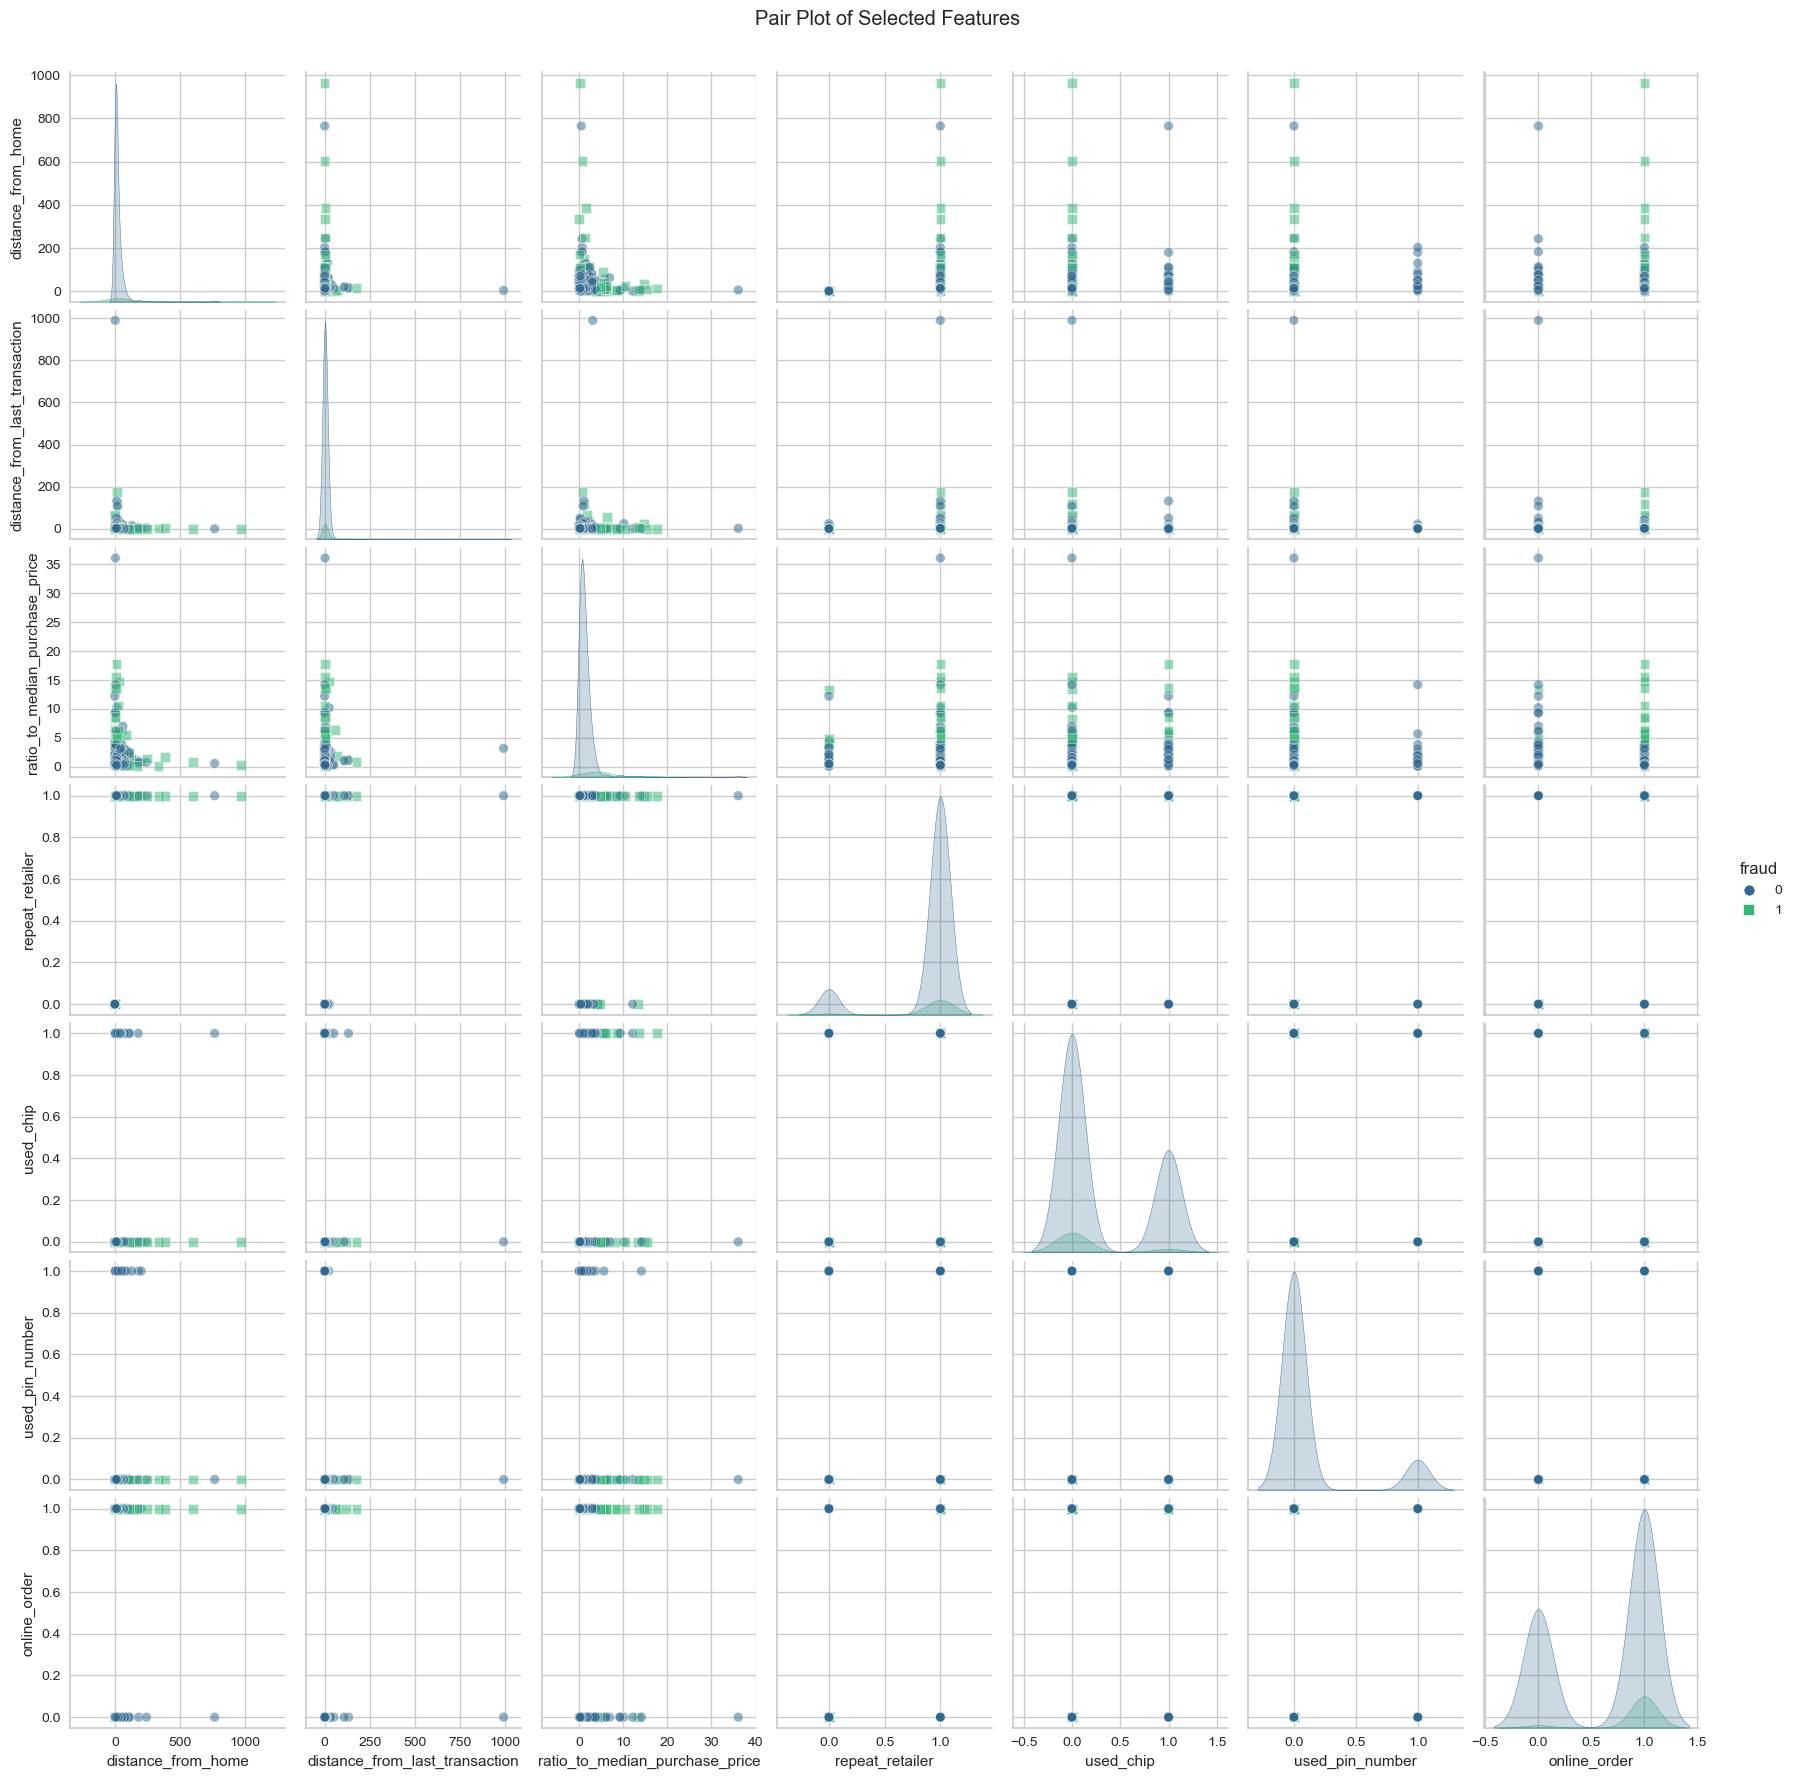

In [27]:
# Select columns for scatter plot
scatter_columns = ['distance_from_home', 'distance_from_last_transaction',
                   'ratio_to_median_purchase_price', 'repeat_retailer',
                   'used_chip', 'used_pin_number', 'online_order', 'fraud']

# Create a pair plot (scatter plot matrix)
warnings.filterwarnings("ignore")
sns.pairplot(df[scatter_columns], hue='fraud', markers=["o", "s"], palette='viridis', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [4]:
# Split target column from dataset
y = df['fraud']
X = df.drop(columns='fraud')

In [5]:
# Preview the data
X[:5]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [6]:
X.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940                1          1   
1                             1.294219                1          0   
2            

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.shape

(750000, 7)

In [9]:
X_test.shape

(250000, 7)

In [10]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [12]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[227959,    200],
       [   118,  21723]], dtype=int64)

In [15]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    228159
           1       0.99      0.99      0.99     21841

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



In [16]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_logistic
})

# Print the DataFrame with actual and predicted values
print("Actual vs. Predicted:")
print(results_df)

Actual vs. Predicted:
        Actual  Predicted
276826       0          0
849425       0          0
504499       0          0
601054       0          0
980221       1          0
...        ...        ...
859353       0          0
3616         0          0
551871       0          0
973439       0          0
689661       0          0

[250000 rows x 2 columns]


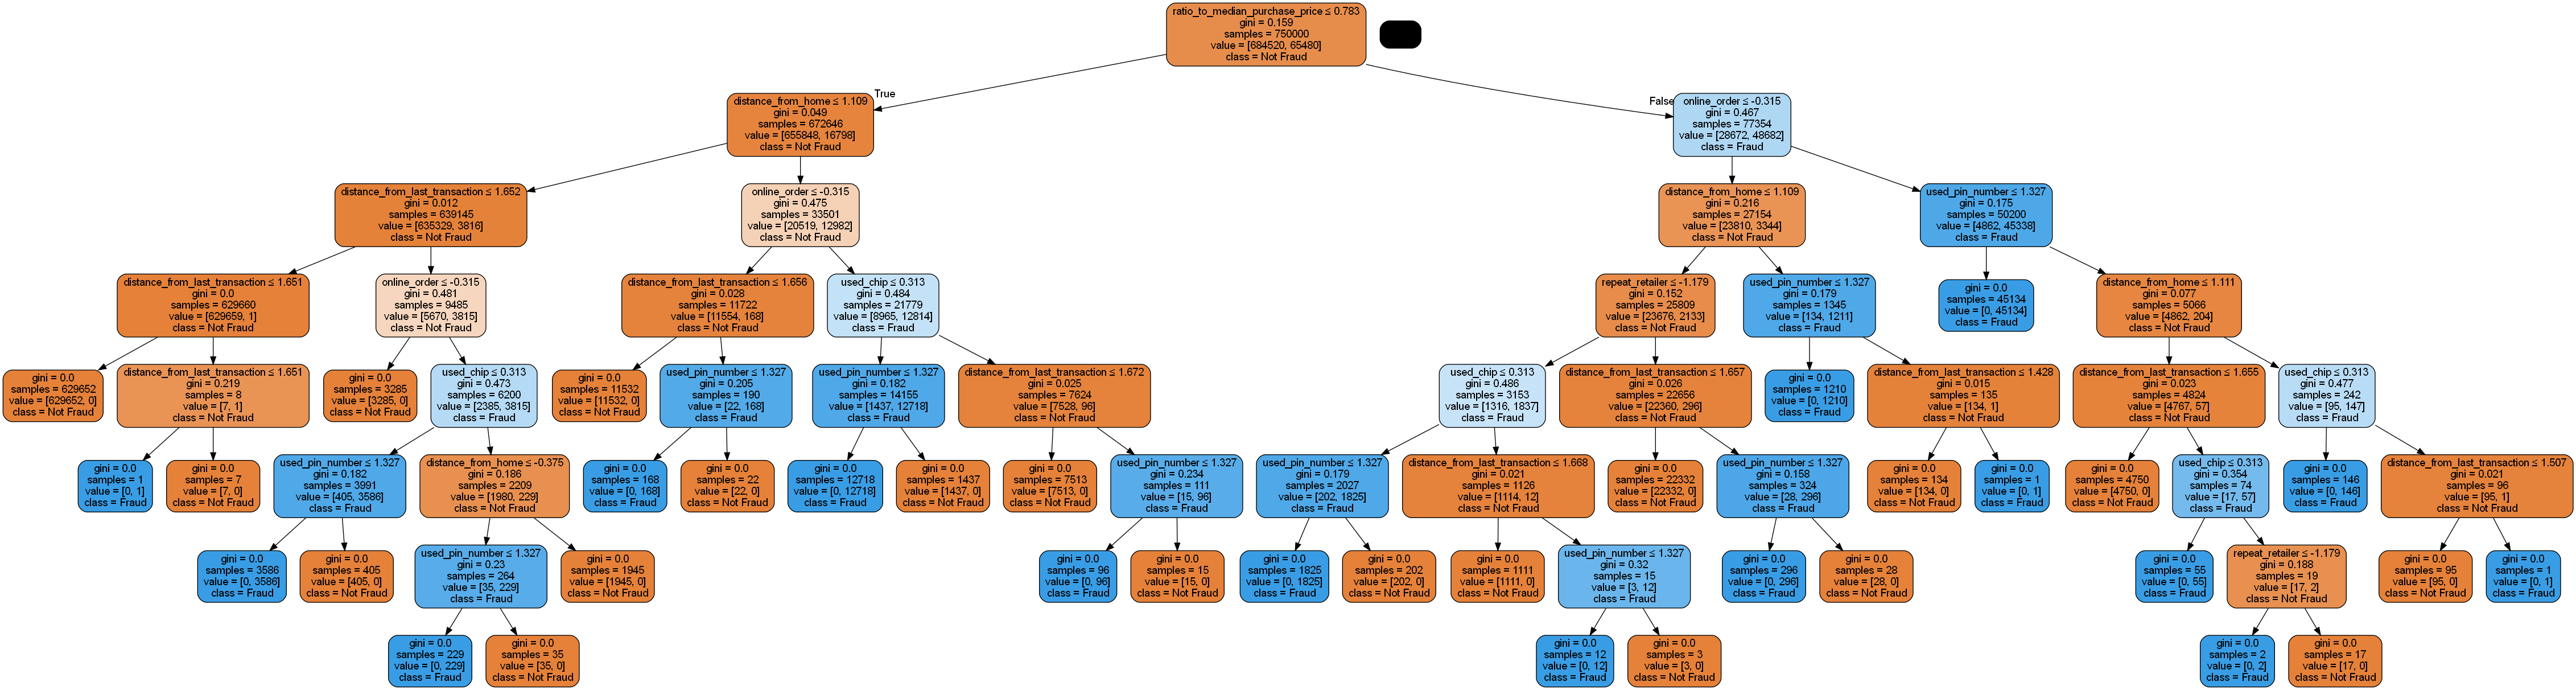

In [18]:
# Decision Tree Visualization
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

# Visualize the decision tree
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'],
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


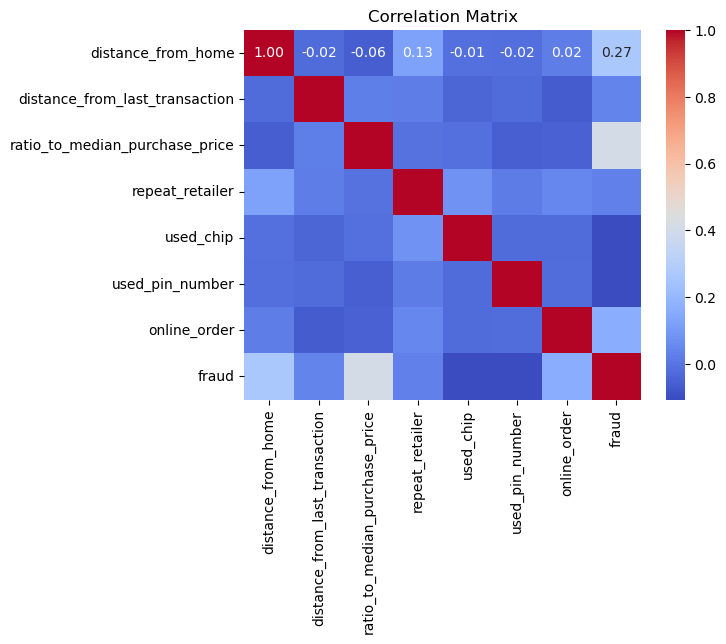

In [19]:
# Visualize the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()